In [131]:
import jax
import jax.numpy as jnp
from tqdm import tqdm
import netket as nk
# import netket_pro as nkp
import matplotlib.pyplot as plt
import os

In [132]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [133]:
from grad_sample.utils.plotting_setup import *

In [143]:
def plot_multi_alpha(alpha_max, strategy="curved_dist"):
    alpha_l = range(1, alpha_max)
    dict_l = []
    colors = sns.color_palette("colorblind", alpha_max)
    cmap = plt.cm.colors.ListedColormap(colors)
    for alpha in alpha_l:
        path= f"/scratch/.amisery/grad_sample/ising_1.0/L3/RBM/alpha{alpha}/saved_10_10/out_analysis_oneshot_{strategy}.npz"
        dict_l.append(jnp.load(path, allow_pickle=True)["arr_0"].item())
    n_err = 9
    delta= dict_l[0]["commons"]["delta"]
    fig, axes = plt.subplots(1, n_err-1, figsize=(20,3))

    for j in range(1,n_err):
        for i in range(len(alpha_l)): 
            out_dict = dict_l[i]
            keys = list(out_dict.keys())[1:]
            # keys  = jnp.argwhere(keys.type == int)
            if j < len(keys):
                alpha = alpha_l[i]
                axes[j-1].plot(out_dict[keys[j]]["infid_ev"], label = r"$\alpha = %d$"%alpha, color= cmap(i))
                axes[j-1].set_yscale("log")
                axes[j-1].set_title(r"$\sigma_{rel} \approx 10^{-%d},\newline \delta =%.1e$"%(j, out_dict[keys[j]]["delta"]), fontsize=15)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.98,0.9))
    fig.suptitle(r"Robustness of $\frac{FS(\ket{\psi_{\theta+\delta \dot{\theta}}}, (I -\delta H) \ket{\psi_\theta})}{FS(\ket{\psi_{\theta}}, (I -\delta H) \ket{\psi_\theta})}$ to sample pruning, $\delta = %.2e$"%delta, y=1.3, fontsize=23)
    plt.show()
    plt.clf()

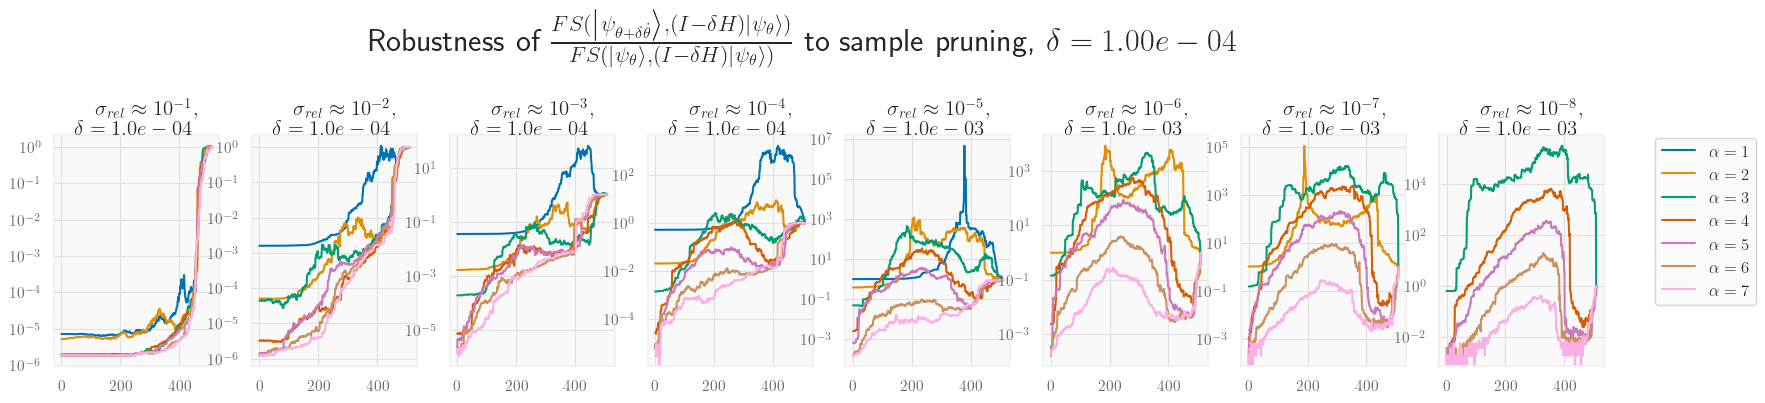

<Figure size 1000x600 with 0 Axes>

In [148]:
plot_multi_alpha(8)

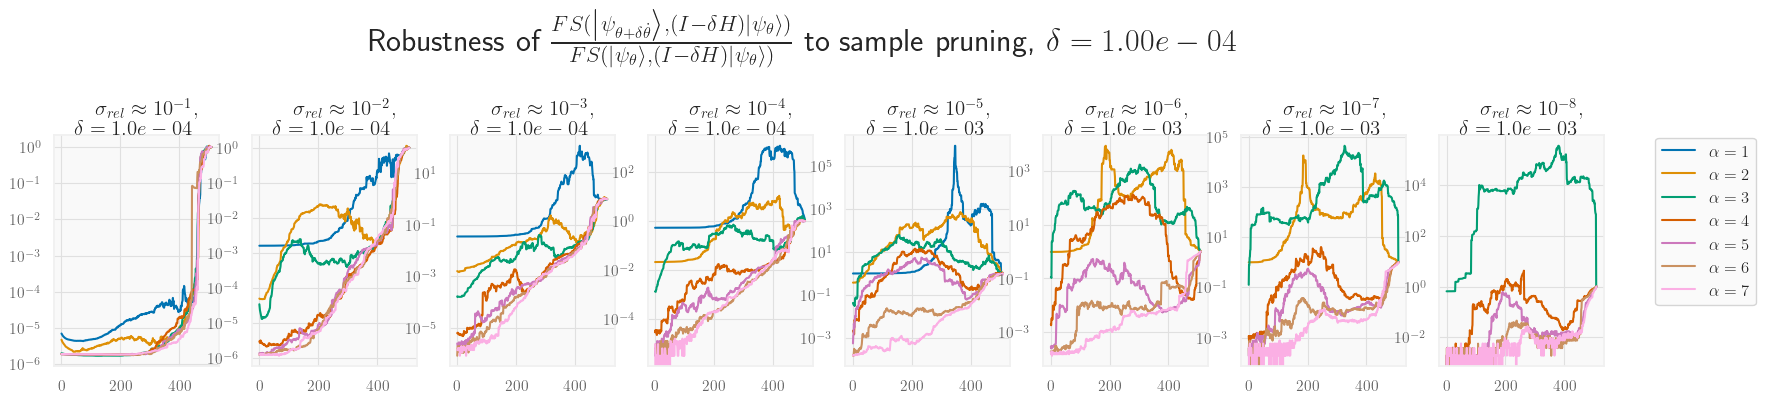

<Figure size 1000x600 with 0 Axes>

In [147]:
plot_multi_alpha(8, "infidelity")

In [173]:
def plot_multi_alpha_val(alpha_max, key="pdf", center=False, strategy="curved_dist"):
    alpha_l = range(1, alpha_max)
    dict_l = []
    colors = sns.color_palette("colorblind", alpha_max)
    cmap = plt.cm.colors.ListedColormap(colors)
    for alpha in alpha_l:
        path= f"/scratch/.amisery/grad_sample/ising_1.0/L3/RBM/alpha{alpha}/saved_10_10/out_analysis_oneshot_{strategy}.npz"
        dict_l.append(jnp.load(path, allow_pickle=True)["arr_0"].item())
    n_err = 9
    delta= dict_l[0]["commons"]["delta"]

    fig, axes = plt.subplots(len(alpha_l), n_err-1, figsize=(20,20))

    for j in range(1,n_err):
        for i in range(len(alpha_l)): 
            out_dict = dict_l[i]
            keys = list(out_dict.keys())[1:]
            # keys  = jnp.argwhere(keys.type == int)
            if j < len(keys):
                vals = out_dict[keys[j]]["in_idx"]
                obs = out_dict[keys[j]][key]
                alpha = alpha_l[i]
                if center:
                    pdf =  obs = out_dict[keys[j]]["pdf"]
                    obs = obs - jnp.sum(obs*pdf)
                axes[i,j-1].scatter(jnp.arange(512), jnp.abs(obs[vals]), label = "|obs %s|"%key, color= cmap(i))
                axes[i,j-1].set_yscale("log")
                axes[i,j-1].set_title(r"$\sigma_{rel} \approx 10^{-%d},\newline \delta =%.1e$"%(j, out_dict[keys[j]]["delta"]), fontsize=15)
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.98,0.9))
    fig.suptitle(r"Robustness of $\frac{FS(\ket{\psi_{\theta+\delta \dot{\theta}}}, (I -\delta H) \ket{\psi_\theta})}{FS(\ket{\psi_{\theta}}, (I -\delta H) \ket{\psi_\theta})}$ to sample pruning, $\delta = %.2e$"%delta, fontsize=23)
    plt.show()
    plt.clf()

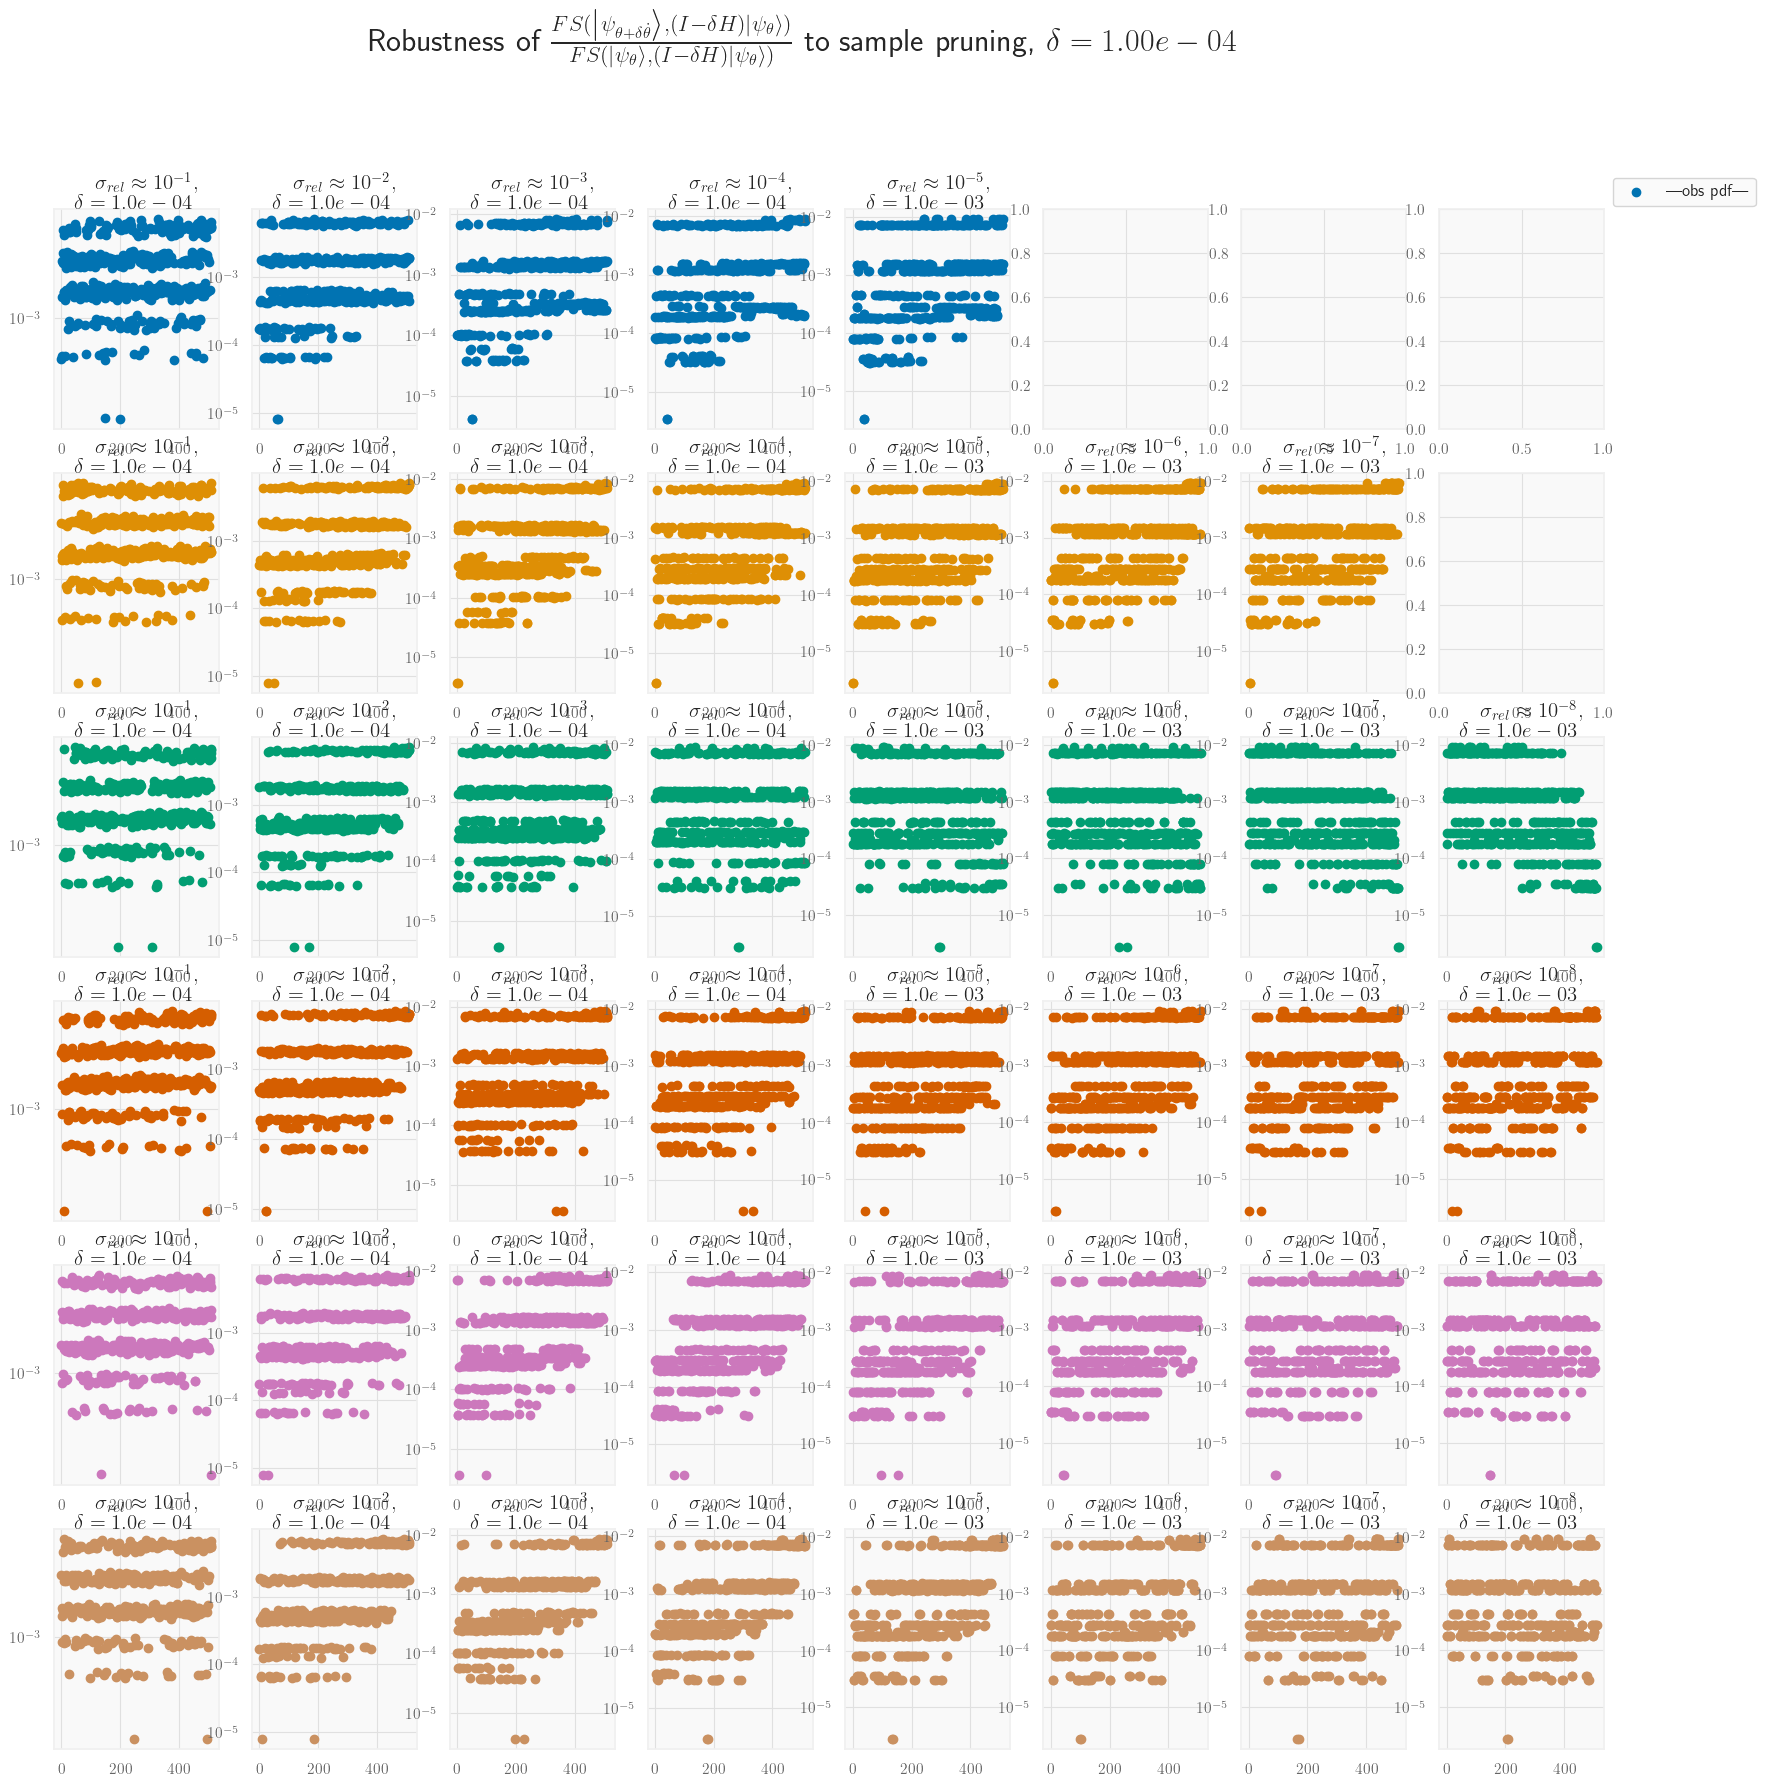

<Figure size 1000x600 with 0 Axes>

In [174]:
plot_multi_alpha_val(7)

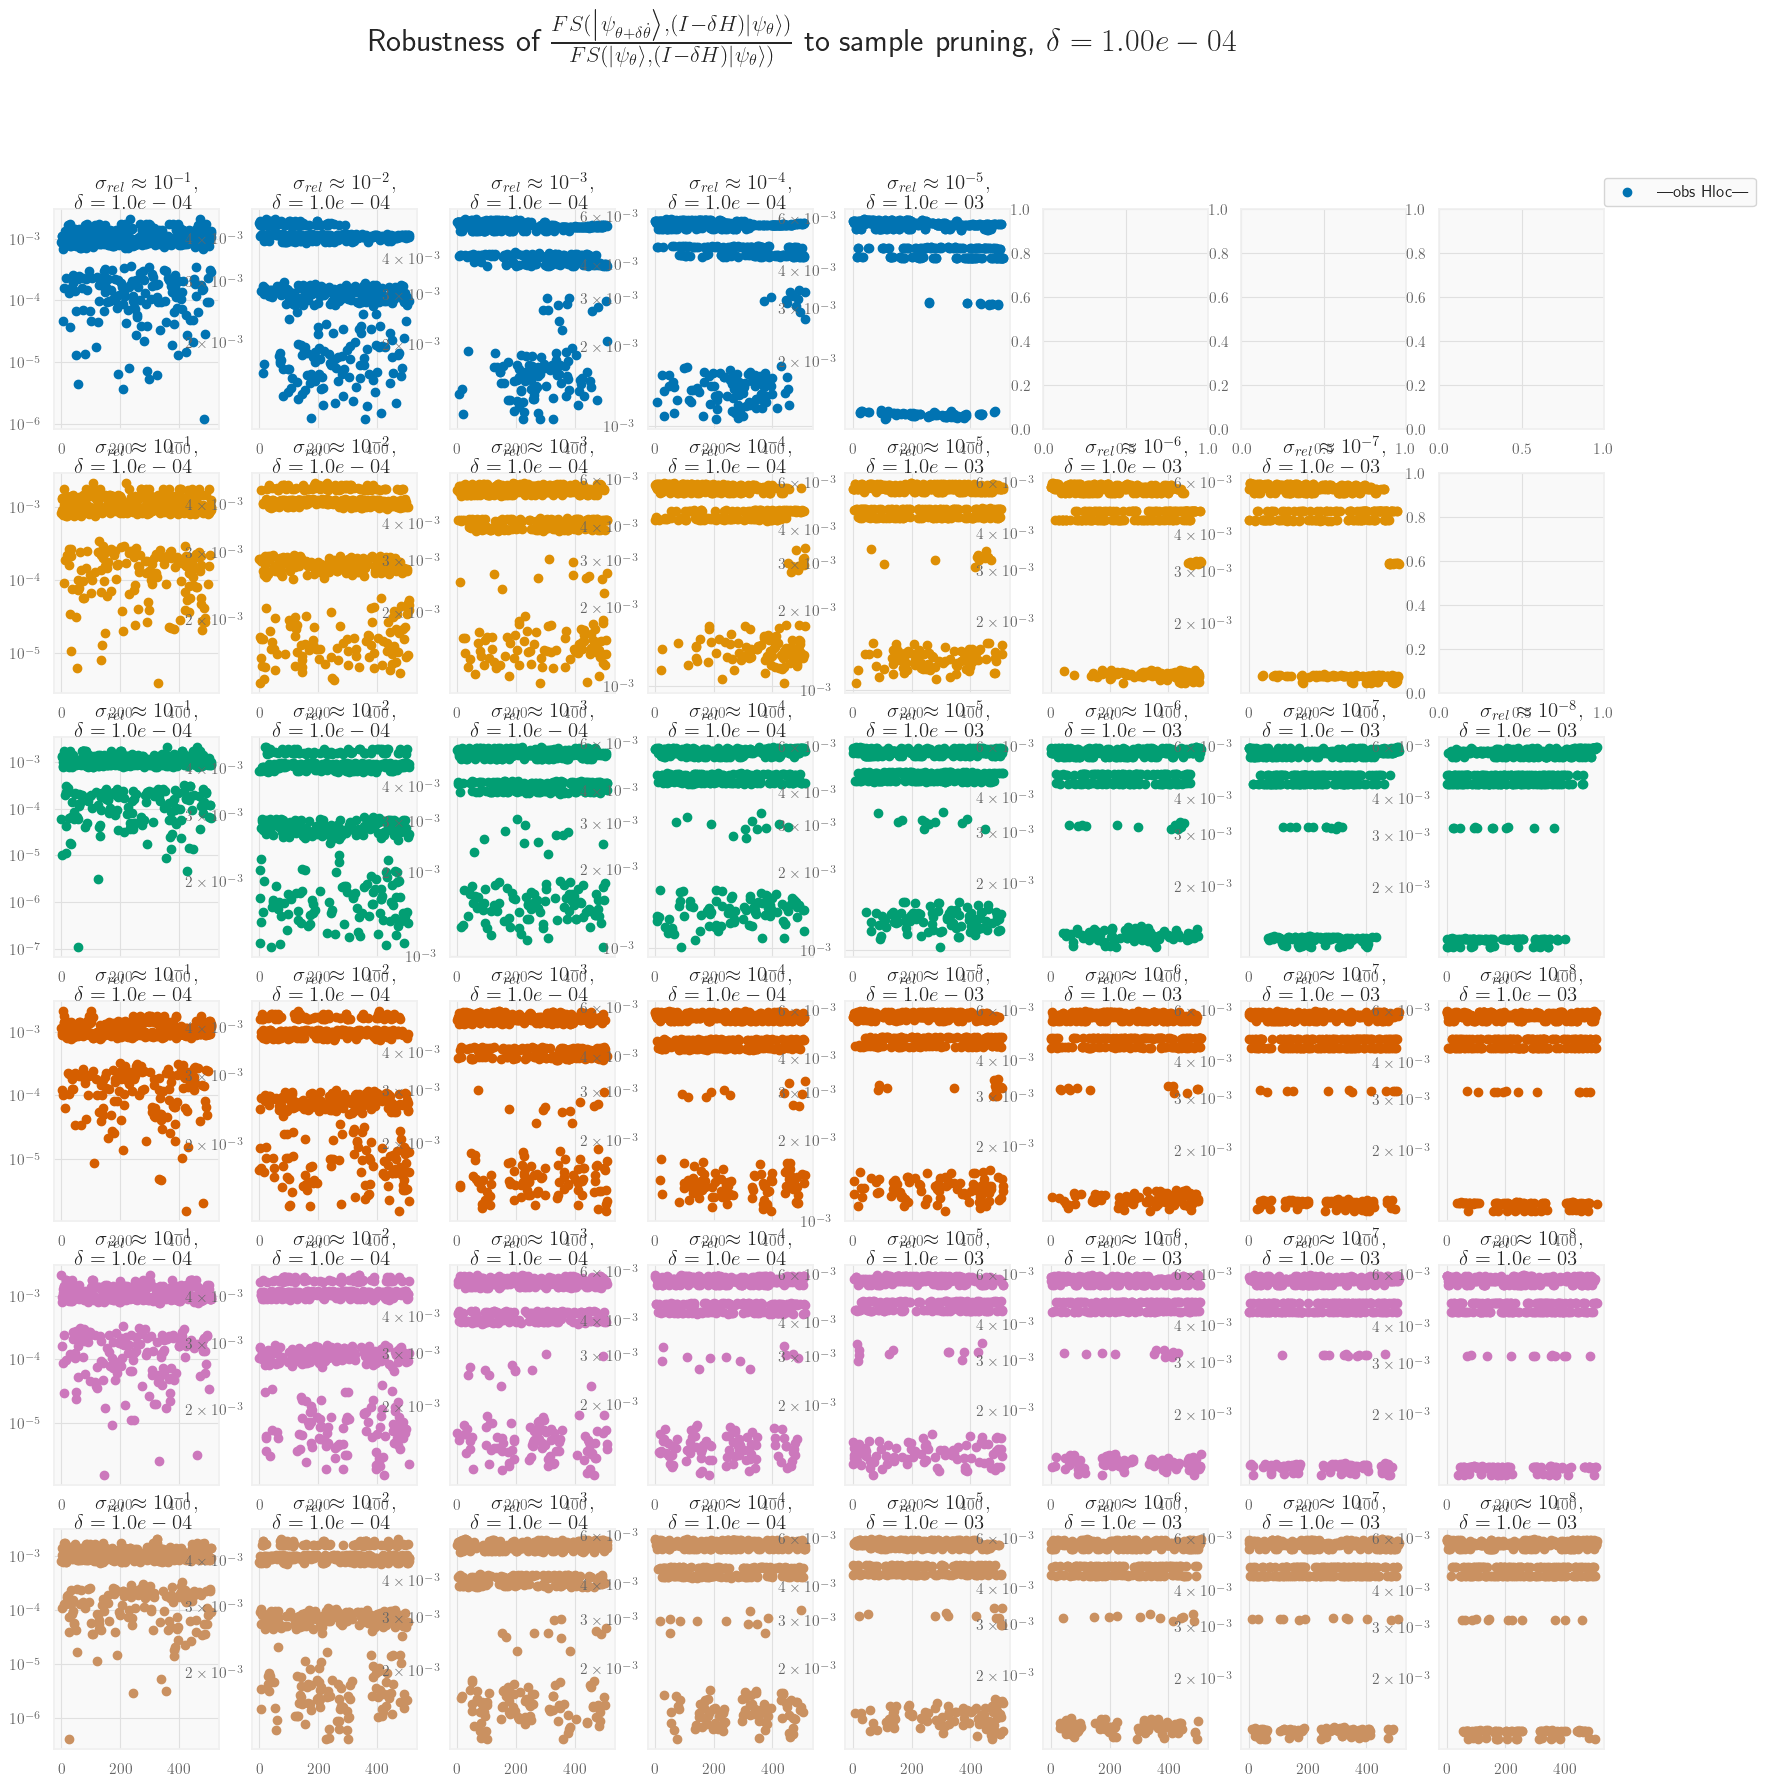

<Figure size 1000x600 with 0 Axes>

In [175]:
plot_multi_alpha_val(7, "Hloc", center=True, strategy="infidelity")

In [135]:
n = 6
n*(9*9) + n*9 + 9

549